In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
MAE = pd.read_csv('MAE_result.csv', index_col=0)
MSE = pd.read_csv('MSE_result.csv', index_col=0)
RMSE = pd.read_csv('RMSE_result.csv', index_col=0)

In [3]:
MAE_loss = MAE['loss(MSE)']
MSE_loss = MSE['loss(MSE)']
RMSE_loss = RMSE['loss(MSE)']
MAE_R2 = MAE['R2 Score']
MSE_R2 = MSE['R2 Score']
RMSE_R2 = RMSE['R2 Score']

In [4]:
DF = MAE.copy()
DF['loss(RMSE)'] = RMSE_loss
DF['loss(MAE)'] = MAE_loss
DF.drop(['R2 Score'], axis=1, inplace=True)
DF.drop(['Loss'], axis=1, inplace=True)
DF["R2(MAE)"] = MAE_R2
DF["R2(MSE)"] = MSE_R2
DF["R2(RMSE)"] = RMSE_R2

In [5]:
DF.index = DF.index.to_series().replace({'NeuralNet1': 'NN1(ReLU)', 'NeuralNet2': 'NN2(ReLU)', 'NeuralNet3': 'NN1(sigmoid)', 'NeuralNet4': 'NN2(sigmoid)'})

In [6]:
DF[DF.index == 'NN1(ReLU)']

,learning_rate,loss(MAE),loss(MSE),loss(RMSE),R2(MAE),R2(MSE),R2(RMSE)
Model,,,,,,,
NN1(ReLU),0.001,0.014451,0.014451,0.013967,0.938799,0.944016,0.944716
NN1(ReLU),0.010,0.026784,0.026784,0.028293,0.924924,0.937821,0.934211
NN1(ReLU),0.100,0.369105,0.369105,0.430284,-0.000009,-0.006697,-0.000094


In [7]:
DF

,learning_rate,loss(MAE),loss(MSE),loss(RMSE),R2(MAE),R2(MSE),R2(RMSE)
Model,,,,,,,
NN1(ReLU),0.001,0.014451,0.014451,0.013967,0.938799,0.944016,0.944716
NN1(ReLU),0.010,0.026784,0.026784,0.028293,0.924924,0.937821,0.934211
NN1(ReLU),0.100,0.369105,0.369105,0.430284,-0.000009,-0.006697,-0.000094
NN2(ReLU),0.001,0.013295,0.013295,0.010030,0.943308,0.949875,0.946566
NN2(ReLU),0.010,0.019981,0.019981,0.013442,0.938132,0.945476,0.945146
NN2(ReLU),0.100,0.356884,0.356884,0.420012,-0.041042,-0.020343,-0.017001
NN1(sigmoid),0.001,0.007618,0.007618,0.007977,0.931238,0.939291,0.943227
NN1(sigmoid),0.010,0.009411,0.009411,0.011188,0.939729,0.949298,0.940647
NN1(sigmoid),0.100,0.275502,0.275502,0.265429,0.172304,0.779798,0.483119


In [10]:
row_with_largest_R2_MAE = DF.loc[DF['R2(MAE)'].idxmax()]
print(row_with_largest_R2_MAE)


           learning_rate  loss(MAE)  loss(MSE)  loss(RMSE)   R2(MAE)  \
Model                                                                  
NN2(ReLU)          0.001   0.013295   0.013295    0.010030  0.943308   
NN2(ReLU)          0.010   0.019981   0.019981    0.013442  0.938132   
NN2(ReLU)          0.100   0.356884   0.356884    0.420012 -0.041042   

            R2(MSE)  R2(RMSE)  
Model                          
NN2(ReLU)  0.949875  0.946566  
NN2(ReLU)  0.945476  0.945146  
NN2(ReLU) -0.020343 -0.017001  


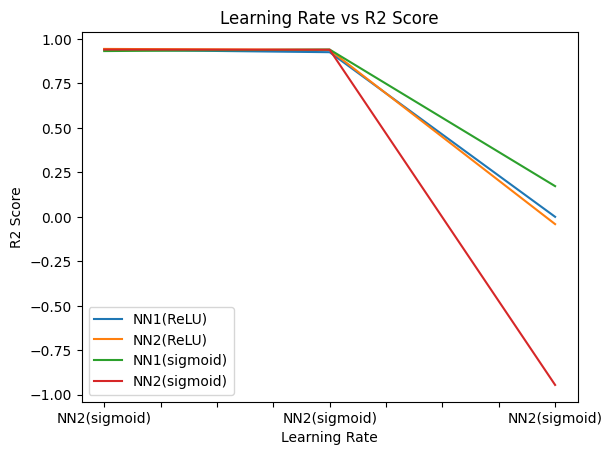

In [8]:
DF[DF.index == 'NN1(ReLU)']["R2(MAE)"].plot(x=DF[DF.index == 'NN1(ReLU)']["learning_rate"], kind='line', label='NN1(ReLU)')
DF[DF.index == 'NN2(ReLU)']["R2(MAE)"].plot(x=DF[DF.index == 'NN2(ReLU)']["learning_rate"], kind='line', label='NN2(ReLU)')
DF[DF.index == 'NN1(sigmoid)']["R2(MAE)"].plot(x=DF[DF.index == 'NN1(sigmoid)']["learning_rate"], kind='line', label='NN1(sigmoid)')
DF[DF.index == 'NN2(sigmoid)']["R2(MAE)"].plot(x=DF[DF.index == 'NN2(sigmoid)']["learning_rate"], kind='line', label='NN2(sigmoid)')

plt.xlabel('Learning Rate')
plt.ylabel('R2 Score')
plt.title('Learning Rate vs R2 Score')
plt.legend()
plt.show()

In [9]:
DF.to_csv('output.csv')